In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.nn as nn
from torch.distributions import Normal
from torch.distributions.kl import kl_divergence
import sys
sys.path.append('..')

import logging
from src.utils import setup_logging
setup_logging(console=True, file=False, debug=True)
logger = logging.getLogger(__name__)

[INFO]: Logging setup completed at 08-08-2024-153101        (utils.py:62 [15:31:01])


['The night will start off chilly with temperatures around 9 degrees, gradually dropping to 6.8 degrees by early morning. We can expect a warm day ahead with temperatures rising steadily, peaking at 22.3 degrees in the afternoon, and cooling down to 15.3 degrees by midnight.']


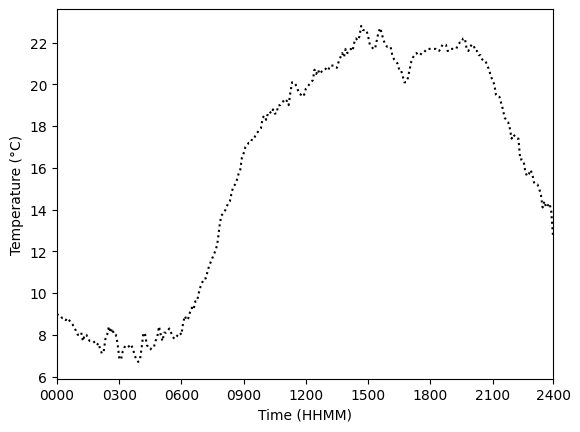

In [2]:
import pandas as pd
from data.tempdata import TempData
import matplotlib.pyplot as plt
# Load the data
data_path = '../data/data_with_desc.csv'
data = pd.read_csv(data_path, header=None)
data_test = TempData(data=data, max_num_context=10, device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))

temporary_batch_size = 1
batch = data_test.generate_batch(batch_size=temporary_batch_size, split='train', return_knowledge=True)

fig = plt.figure()
print(batch.knowledge)
for i in range(temporary_batch_size):
    x_target = batch.x_target[i].flatten()
    y_target = batch.y_target[i].flatten()
    plt.plot(x_target.numpy(), y_target.numpy(), 'k:')
# for i in range(temporary_batch_size):
#     x_context = batch.x_context[i].flatten()
#     y_context = batch.y_context[i].flatten()
#     plt.scatter(x_context.numpy(), y_context.numpy())
plt.xlim(-2, 2)
    # Formatting the x-axis to display time in "HHMM" format
plt.xticks(list(x_target[::36])+ [2.0], labels=["0000", "0300", "0600", "0900", "1200", "1500", "1800", "2100", "2400"])

# Label axes
plt.xlabel('Time (HHMM)')
plt.ylabel('Temperature (°C)')

# fig.savefig('../figures/temperature_sample1', dpi=300)
plt.show()

In [12]:
def eval(model, data, use_knowledge=True, num_context=None):
    model.training = False
    with torch.no_grad():
        test_loss = 0
        n_test_batches = 128
        test_batch_size = 96
        for _ in range(n_test_batches):
            batch = data.generate_batch(batch_size=test_batch_size,
                                    device=DEVICE,
                                    return_knowledge=use_knowledge,
                                    split='test',
                                    num_context=num_context)
            
            p_y_pred, q_z_context, q_z_target = model(batch.x_context,
                                                  batch.y_context,
                                                  batch.x_target,
                                                  batch.y_target,
                                                  batch.knowledge)
            test_loss_dict = loss_function(p_y_pred, q_z_context, None, batch.y_target)
            test_loss += test_loss_dict["loss"].item() / n_test_batches
        # val_losses.append(val_loss)
        
    model.training = True
    print(test_loss)
    return test_loss


[INFO]: Using DEVICE: cuda:0        (453429107.py:9 [23:12:21])
[INFO]: USE_KNOWLEDGE: True        (453429107.py:12 [23:12:21])
[INFO]: Using optimiser Adam        (453429107.py:21 [23:12:21])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:12:21])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:12:21])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [23:12:21])
[DEBUG]: Resetting dropped connection: huggingface.co        (connectionpool.py:291 [23:12:21])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [23:12:21])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [23:12:21])
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You sh

iter 1: Val. Loss (NLL): 37809.237731933594


[INFO]: Saving new best val loss model at iter 1        (train.py:106 [23:13:06])
  4%|▍         | 249/6000 [00:57<07:33, 12.67it/s] [INFO]: Removing model at path '../exp/k-multirun-0_iter1.pt'        (train.py:111 [23:13:54])


iter 250: Val. Loss (NLL): 998.6651968955994


[INFO]: Saving new best val loss model at iter 250        (train.py:116 [23:13:55])
  8%|▊         | 499/6000 [01:34<10:03,  9.11it/s]  [INFO]: Removing model at path '../exp/k-multirun-0_iter250.pt'        (train.py:111 [23:14:30])


iter 500: Val. Loss (NLL): 774.798773765564


[INFO]: Saving new best val loss model at iter 500        (train.py:116 [23:14:32])
 12%|█▏        | 748/6000 [02:10<08:01, 10.91it/s]  [INFO]: Removing model at path '../exp/k-multirun-0_iter500.pt'        (train.py:111 [23:15:06])


iter 750: Val. Loss (NLL): 677.4202637672424


 17%|█▋        | 1001/6000 [02:59<2:38:17,  1.90s/it]

iter 1000: Val. Loss (NLL): 679.2521514892578


 21%|██        | 1249/6000 [03:19<08:16,  9.56it/s]  [INFO]: Removing model at path '../exp/k-multirun-0_iter750.pt'        (train.py:111 [23:16:16])


iter 1250: Val. Loss (NLL): 662.6100482940674


 25%|██▌       | 1501/6000 [04:10<2:11:16,  1.75s/it]

iter 1500: Val. Loss (NLL): 670.532965183258


 29%|██▉       | 1748/6000 [04:44<07:01, 10.08it/s]  [INFO]: Removing model at path '../exp/k-multirun-0_iter1250.pt'        (train.py:111 [23:17:29])


iter 1750: Val. Loss (NLL): 539.0381679534912


[INFO]: Saving new best val loss model at iter 1750        (train.py:116 [23:17:31])
 33%|███▎      | 2001/6000 [05:22<1:54:28,  1.72s/it]

iter 2000: Val. Loss (NLL): 552.2859239578247


 38%|███▊      | 2251/6000 [06:22<5:44:30,  5.51s/it]

iter 2250: Val. Loss (NLL): 607.6038990020752


 42%|████▏     | 2502/6000 [06:58<1:23:25,  1.43s/it]

iter 2500: Val. Loss (NLL): 748.9970412254333


 46%|████▌     | 2752/6000 [07:33<1:31:06,  1.68s/it]

iter 2750: Val. Loss (NLL): 546.7930703163147


 50%|█████     | 3001/6000 [08:08<1:27:37,  1.75s/it]

iter 3000: Val. Loss (NLL): 540.2855651378632


 54%|█████▍    | 3247/6000 [08:29<04:15, 10.75it/s]  [INFO]: Removing model at path '../exp/k-multirun-0_iter1750.pt'        (train.py:111 [23:21:26])


iter 3250: Val. Loss (NLL): 536.1009886264801


 58%|█████▊    | 3498/6000 [09:07<03:16, 12.70it/s]  [INFO]: Removing model at path '../exp/k-multirun-0_iter3250.pt'        (train.py:111 [23:22:03])


iter 3500: Val. Loss (NLL): 510.7188925743103


[INFO]: Saving new best val loss model at iter 3500        (train.py:116 [23:22:05])
 63%|██████▎   | 3751/6000 [09:57<1:11:18,  1.90s/it]

iter 3750: Val. Loss (NLL): 575.2658228874207


 67%|██████▋   | 4001/6000 [10:34<58:03,  1.74s/it]  

iter 4000: Val. Loss (NLL): 518.329980134964


 71%|███████   | 4252/6000 [11:10<43:59,  1.51s/it]

iter 4250: Val. Loss (NLL): 716.979540348053


 75%|███████▌  | 4501/6000 [11:46<45:47,  1.83s/it]

iter 4500: Val. Loss (NLL): 523.8248558044434


 79%|███████▉  | 4751/6000 [12:21<36:28,  1.75s/it]

iter 4750: Val. Loss (NLL): 553.3031911849976


 83%|████████▎ | 5001/6000 [13:03<43:19,  2.60s/it]

iter 5000: Val. Loss (NLL): 585.3655319213867


 88%|████████▊ | 5253/6000 [13:38<17:38,  1.42s/it]

iter 5250: Val. Loss (NLL): 572.9481239318848


 92%|█████████▏| 5503/6000 [14:14<10:24,  1.26s/it]

iter 5500: Val. Loss (NLL): 608.0827879905701


 96%|█████████▌| 5753/6000 [14:50<06:09,  1.50s/it]

iter 5750: Val. Loss (NLL): 639.2208671569824


100%|██████████| 6000/6000 [15:25<00:00,  6.48it/s]

iter 6000: Val. Loss (NLL): 747.9062361717224


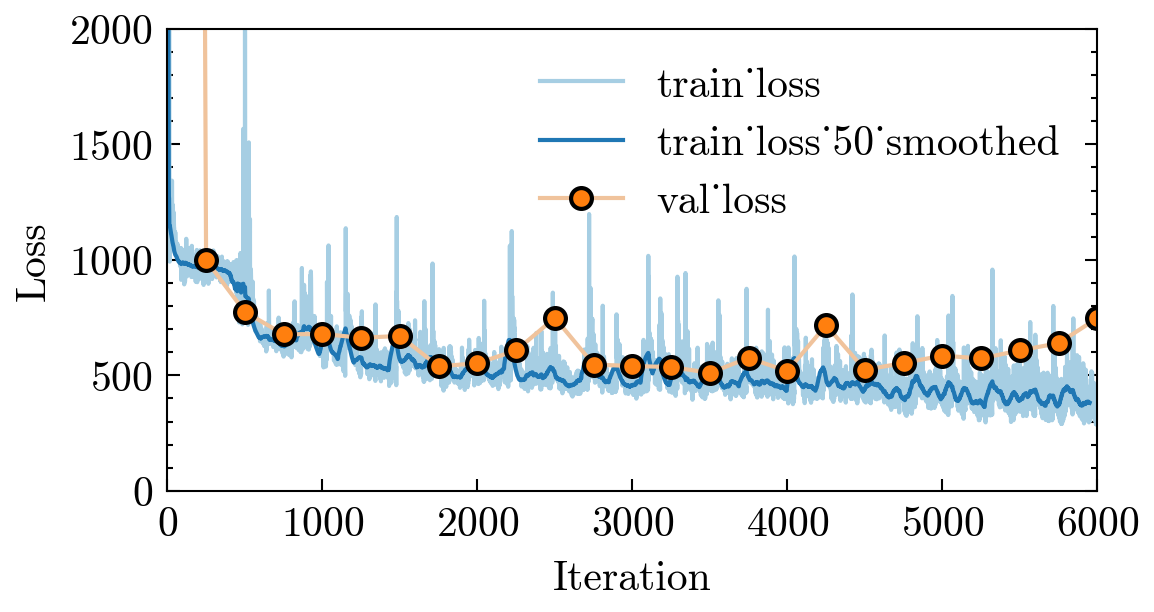

[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:28:09])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:28:09])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [23:28:09])
  0%|          | 8/6000 [00:01<15:06,  6.61it/s]  

iter 1: Val. Loss (NLL): 33917.12890625


  4%|▍         | 246/6000 [00:05<01:32, 62.52it/s][INFO]: Removing model at path '../exp/nok-multirun-0_iter1.pt'        (train.py:111 [23:28:16])
[INFO]: Saving new best val loss model at iter 250        (train.py:116 [23:28:16])
  4%|▍         | 260/6000 [00:07<05:50, 16.37it/s]

iter 250: Val. Loss (NLL): 864.2703595161438


  8%|▊         | 498/6000 [00:10<01:28, 62.24it/s][INFO]: Removing model at path '../exp/nok-multirun-0_iter250.pt'        (train.py:111 [23:28:21])
[INFO]: Saving new best val loss model at iter 500        (train.py:116 [23:28:21])
  8%|▊         | 505/6000 [00:12<07:21, 12.44it/s]

iter 500: Val. Loss (NLL): 657.4977278709412


 13%|█▎        | 757/6000 [00:18<05:12, 16.80it/s]

iter 750: Val. Loss (NLL): 729.6675972938538


 17%|█▋        | 1009/6000 [00:23<04:56, 16.85it/s]

iter 1000: Val. Loss (NLL): 711.0557248592377


 21%|██        | 1261/6000 [00:28<04:43, 16.73it/s]

iter 1250: Val. Loss (NLL): 711.2426705360413


 25%|██▌       | 1512/6000 [00:33<04:02, 18.49it/s]

iter 1500: Val. Loss (NLL): 699.3134791851044


 29%|██▉       | 1757/6000 [00:39<04:14, 16.66it/s]

iter 1750: Val. Loss (NLL): 686.15918135643


 33%|███▎      | 2009/6000 [00:44<03:58, 16.71it/s]

iter 2000: Val. Loss (NLL): 762.586389541626


 38%|███▊      | 2251/6000 [01:05<1:53:16,  1.81s/it]

iter 2250: Val. Loss (NLL): 678.3417165279388


 42%|████▏     | 2508/6000 [01:21<03:28, 16.71it/s]  

iter 2500: Val. Loss (NLL): 767.2308030128479


 46%|████▌     | 2760/6000 [01:26<03:13, 16.74it/s]

iter 2750: Val. Loss (NLL): 771.6238822937012


 50%|█████     | 3012/6000 [01:32<02:58, 16.78it/s]

iter 3000: Val. Loss (NLL): 836.6853337287903


 54%|█████▍    | 3257/6000 [01:37<02:43, 16.74it/s]

iter 3250: Val. Loss (NLL): 671.2322335243225


 58%|█████▊    | 3509/6000 [01:43<02:28, 16.74it/s]

iter 3500: Val. Loss (NLL): 787.196031332016


 63%|██████▎   | 3761/6000 [01:48<02:13, 16.73it/s]

iter 3750: Val. Loss (NLL): 728.2291066646576


 67%|██████▋   | 4006/6000 [01:53<02:36, 12.73it/s]

iter 4000: Val. Loss (NLL): 678.7161133289337


 71%|███████   | 4257/6000 [01:59<01:44, 16.74it/s]

iter 4250: Val. Loss (NLL): 801.9069104194641


 75%|███████▌  | 4509/6000 [02:04<01:29, 16.75it/s]

iter 4500: Val. Loss (NLL): 758.3840463161469


 79%|███████▉  | 4761/6000 [02:10<01:13, 16.76it/s]

iter 4750: Val. Loss (NLL): 749.5977931022644


 83%|████████▎ | 5006/6000 [02:15<01:18, 12.74it/s]

iter 5000: Val. Loss (NLL): 762.7288200855255


 88%|████████▊ | 5260/6000 [02:21<00:40, 18.25it/s]

iter 5250: Val. Loss (NLL): 799.2773108482361


 92%|█████████▏| 5507/6000 [02:26<00:29, 16.65it/s]

iter 5500: Val. Loss (NLL): 757.7764830589294


 96%|█████████▌| 5752/6000 [02:31<00:19, 12.76it/s]

iter 5750: Val. Loss (NLL): 722.6026222705841


100%|██████████| 6000/6000 [02:37<00:00, 38.11it/s]

iter 6000: Val. Loss (NLL): 791.1830694675446


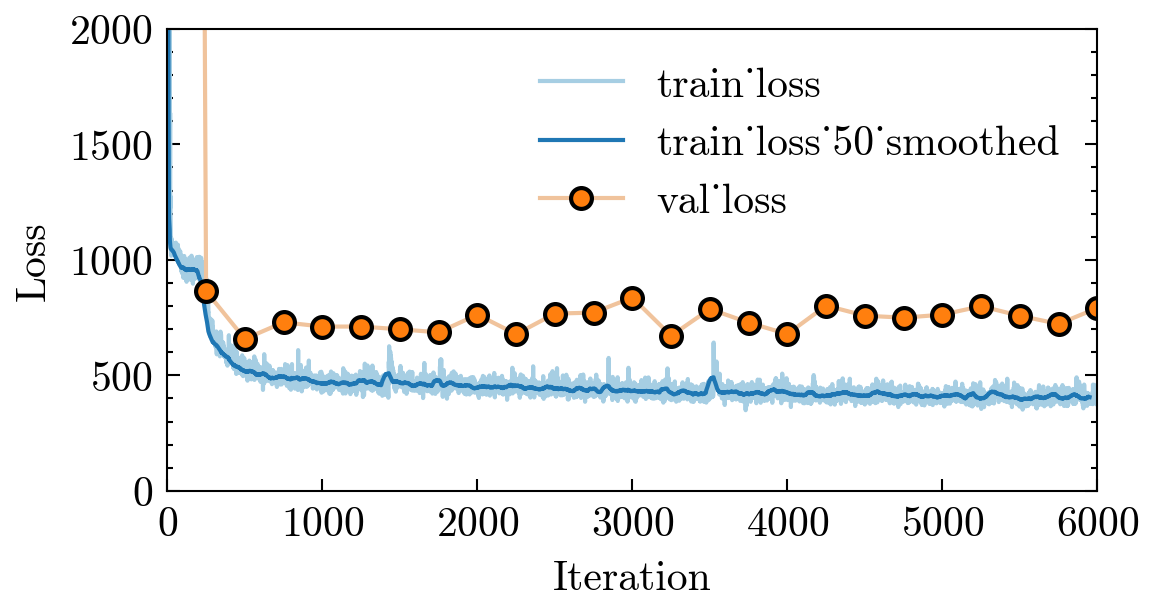

593.5043091773987
602.0366525650024
831.227774143219
825.515622138977
669.5376949310303
651.4480457305908
634.9564626216888
594.9446034431458
578.3095443248749
576.9628100395203
552.1468613147736
558.5180897712708
527.3046209812164
536.4018738269806
517.6420524120331
529.1878936290741
522.6321527957916
532.5219295024872
518.4664046764374
536.290470123291
504.06289553642273
519.8011176586151



[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:31:23])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:31:23])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [23:31:23])
[DEBUG]: Resetting dropped connection: huggingface.co        (connectionpool.py:291 [23:31:23])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [23:31:23])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [23:31:23])
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[DEBUG]: Freezing LLM parameters        (knowledge_encoder.py:28 [23:31:44])
[DEBUG]: Al

iter 1: Val. Loss (NLL): 25360.284469604492


[INFO]: Saving new best val loss model at iter 1        (train.py:106 [23:32:00])
  4%|▍         | 248/6000 [00:36<08:41, 11.03it/s] [INFO]: Removing model at path '../exp/k-multirun-1_iter1.pt'        (train.py:111 [23:32:34])


iter 250: Val. Loss (NLL): 948.799726486206


[INFO]: Saving new best val loss model at iter 250        (train.py:116 [23:32:36])
  8%|▊         | 498/6000 [01:13<08:06, 11.31it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter250.pt'        (train.py:111 [23:33:12])


iter 500: Val. Loss (NLL): 805.8861904144287


[INFO]: Saving new best val loss model at iter 500        (train.py:116 [23:33:13])
 12%|█▏        | 749/6000 [02:02<06:17, 13.90it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter500.pt'        (train.py:111 [23:33:48])


iter 750: Val. Loss (NLL): 638.0683770179749


[INFO]: Saving new best val loss model at iter 750        (train.py:116 [23:33:49])
 17%|█▋        | 1001/6000 [02:39<2:46:56,  2.00s/it]

iter 1000: Val. Loss (NLL): 643.009307384491


 21%|██        | 1249/6000 [03:12<08:00,  9.90it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter750.pt'        (train.py:111 [23:35:00])


iter 1250: Val. Loss (NLL): 628.7755575180054


[INFO]: Saving new best val loss model at iter 1250        (train.py:116 [23:35:01])
 25%|██▍       | 1499/6000 [03:37<06:21, 11.81it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter1250.pt'        (train.py:111 [23:35:35])


iter 1500: Val. Loss (NLL): 611.3323965072632


[INFO]: Saving new best val loss model at iter 1500        (train.py:116 [23:35:36])
 29%|██▉       | 1748/6000 [04:14<07:16,  9.75it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter1500.pt'        (train.py:111 [23:36:12])


iter 1750: Val. Loss (NLL): 533.9864864349365


[INFO]: Saving new best val loss model at iter 1750        (train.py:116 [23:36:14])
 33%|███▎      | 2001/6000 [05:03<1:57:22,  1.76s/it]

iter 2000: Val. Loss (NLL): 541.0145132541656


 37%|███▋      | 2248/6000 [05:25<05:05, 12.27it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter1750.pt'        (train.py:111 [23:37:24])


iter 2250: Val. Loss (NLL): 520.9471831321716


[INFO]: Saving new best val loss model at iter 2250        (train.py:116 [23:37:25])
 42%|████▏     | 2501/6000 [06:16<2:10:08,  2.23s/it]

iter 2500: Val. Loss (NLL): 545.9436614513397


 46%|████▌     | 2749/6000 [06:52<04:25, 12.23it/s]

iter 2750: Val. Loss (NLL): 520.6294813156128


[INFO]: Saving new best val loss model at iter 2750        (train.py:116 [23:38:38])
 50%|████▉     | 2998/6000 [07:16<03:53, 12.85it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter2750.pt'        (train.py:111 [23:39:15])


iter 3000: Val. Loss (NLL): 508.61551427841187


[INFO]: Saving new best val loss model at iter 3000        (train.py:116 [23:39:16])
 54%|█████▍    | 3248/6000 [07:52<04:48,  9.53it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter3000.pt'        (train.py:111 [23:39:51])


iter 3250: Val. Loss (NLL): 508.55400109291077


[INFO]: Saving new best val loss model at iter 3250        (train.py:116 [23:39:52])
 58%|█████▊    | 3498/6000 [08:42<02:36, 15.94it/s]  [INFO]: Removing model at path '../exp/k-multirun-1_iter3250.pt'        (train.py:111 [23:40:28])


iter 3500: Val. Loss (NLL): 489.2574396133423


[INFO]: Saving new best val loss model at iter 3500        (train.py:116 [23:40:29])
 63%|██████▎   | 3752/6000 [09:20<53:33,  1.43s/it]  

iter 3750: Val. Loss (NLL): 511.25740456581116


 67%|██████▋   | 4001/6000 [09:55<54:27,  1.63s/it]  

iter 4000: Val. Loss (NLL): 607.0428562164307


 71%|███████   | 4252/6000 [10:31<51:34,  1.77s/it]  

iter 4250: Val. Loss (NLL): 494.11355781555176


 75%|███████▌  | 4502/6000 [11:06<37:17,  1.49s/it]

iter 4500: Val. Loss (NLL): 508.319278717041


 79%|███████▉  | 4751/6000 [11:43<34:32,  1.66s/it]

iter 4750: Val. Loss (NLL): 528.6192572116852


 83%|████████▎ | 5002/6000 [12:19<24:58,  1.50s/it]

iter 5000: Val. Loss (NLL): 592.1889047622681


 88%|████████▊ | 5251/6000 [12:54<21:13,  1.70s/it]

iter 5250: Val. Loss (NLL): 556.3118343353271


 92%|█████████▏| 5502/6000 [13:32<12:39,  1.53s/it]

iter 5500: Val. Loss (NLL): 612.7513880729675


 96%|█████████▌| 5751/6000 [14:18<07:22,  1.78s/it]

iter 5750: Val. Loss (NLL): 631.1328959465027


100%|██████████| 6000/6000 [15:04<00:00,  6.64it/s]

iter 6000: Val. Loss (NLL): 705.5766434669495


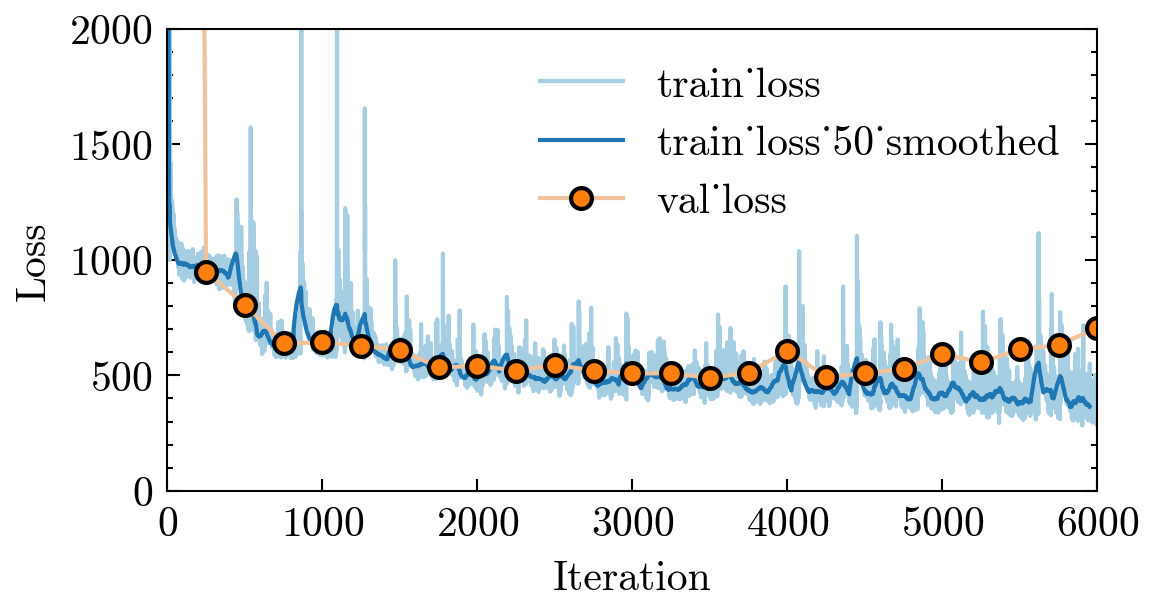

[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:46:49])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:46:49])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [23:46:49])
  0%|          | 8/6000 [00:01<15:05,  6.61it/s]  

iter 1: Val. Loss (NLL): 22633.808975219727


  4%|▍         | 245/6000 [00:05<01:31, 62.59it/s][INFO]: Removing model at path '../exp/nok-multirun-1_iter1.pt'        (train.py:111 [23:46:56])
[INFO]: Saving new best val loss model at iter 250        (train.py:116 [23:46:56])
  4%|▍         | 259/6000 [00:07<05:50, 16.37it/s]

iter 250: Val. Loss (NLL): 953.1228394508362


  8%|▊         | 499/6000 [00:21<01:38, 56.02it/s][INFO]: Removing model at path '../exp/nok-multirun-1_iter250.pt'        (train.py:111 [23:47:13])
[INFO]: Saving new best val loss model at iter 500        (train.py:116 [23:47:13])
  8%|▊         | 505/6000 [00:23<07:51, 11.66it/s]

iter 500: Val. Loss (NLL): 651.7167429924011


 13%|█▎        | 757/6000 [00:28<05:14, 16.68it/s]

iter 750: Val. Loss (NLL): 655.8962736129761


 17%|█▋        | 1009/6000 [00:34<04:59, 16.67it/s]

iter 1000: Val. Loss (NLL): 695.8351192474365


 21%|██        | 1261/6000 [00:39<04:44, 16.65it/s]

iter 1250: Val. Loss (NLL): 755.0401856899261


 25%|██▌       | 1503/6000 [00:55<43:15,  1.73it/s]

iter 1500: Val. Loss (NLL): 794.417738199234


 29%|██▉       | 1758/6000 [01:47<33:08,  2.13it/s]

iter 1750: Val. Loss (NLL): 699.7361726760864


 33%|███▎      | 1999/6000 [01:51<01:04, 61.72it/s][INFO]: Removing model at path '../exp/nok-multirun-1_iter500.pt'        (train.py:111 [23:48:42])
[INFO]: Saving new best val loss model at iter 2000        (train.py:116 [23:48:42])
 33%|███▎      | 2006/6000 [01:53<05:19, 12.49it/s]

iter 2000: Val. Loss (NLL): 617.478542804718


 37%|███▋      | 2243/6000 [01:56<01:00, 62.29it/s][INFO]: Removing model at path '../exp/nok-multirun-1_iter2000.pt'        (train.py:111 [23:48:48])
[INFO]: Saving new best val loss model at iter 2250        (train.py:116 [23:48:48])
 38%|███▊      | 2257/6000 [01:58<03:47, 16.44it/s]

iter 2250: Val. Loss (NLL): 591.8765528202057


 42%|████▏     | 2506/6000 [02:04<04:34, 12.73it/s]

iter 2500: Val. Loss (NLL): 633.8522362709045


 46%|████▌     | 2758/6000 [02:09<03:13, 16.74it/s]

iter 2750: Val. Loss (NLL): 647.8343887329102


 50%|█████     | 3010/6000 [02:15<02:58, 16.74it/s]

iter 3000: Val. Loss (NLL): 844.3055462837219


 54%|█████▍    | 3261/6000 [02:20<02:43, 16.74it/s]

iter 3250: Val. Loss (NLL): 766.3190739154816


 58%|█████▊    | 3506/6000 [02:26<03:16, 12.67it/s]

iter 3500: Val. Loss (NLL): 691.9869236946106


 63%|██████▎   | 3757/6000 [02:31<02:14, 16.71it/s]

iter 3750: Val. Loss (NLL): 720.949738740921


 67%|██████▋   | 4009/6000 [02:37<01:59, 16.68it/s]

iter 4000: Val. Loss (NLL): 782.720089673996


 71%|███████   | 4257/6000 [02:42<01:36, 18.05it/s]

iter 4250: Val. Loss (NLL): 634.4021415710449


 75%|███████▌  | 4509/6000 [02:47<01:29, 16.74it/s]

iter 4500: Val. Loss (NLL): 927.5997633934021


 79%|███████▉  | 4761/6000 [02:53<01:14, 16.70it/s]

iter 4750: Val. Loss (NLL): 855.5830202102661


 84%|████████▎ | 5012/6000 [02:58<00:59, 16.65it/s]

iter 5000: Val. Loss (NLL): 955.9561896324158


 88%|████████▊ | 5257/6000 [03:04<00:55, 13.37it/s]

iter 5250: Val. Loss (NLL): 814.3949325084686


 92%|█████████▏| 5509/6000 [03:10<00:35, 13.74it/s]

iter 5500: Val. Loss (NLL): 987.1406126022339


 96%|█████████▌| 5760/6000 [03:16<00:14, 16.75it/s]

iter 5750: Val. Loss (NLL): 832.5464627742767


100%|██████████| 6000/6000 [03:21<00:00, 29.76it/s]

iter 6000: Val. Loss (NLL): 1198.031095981598


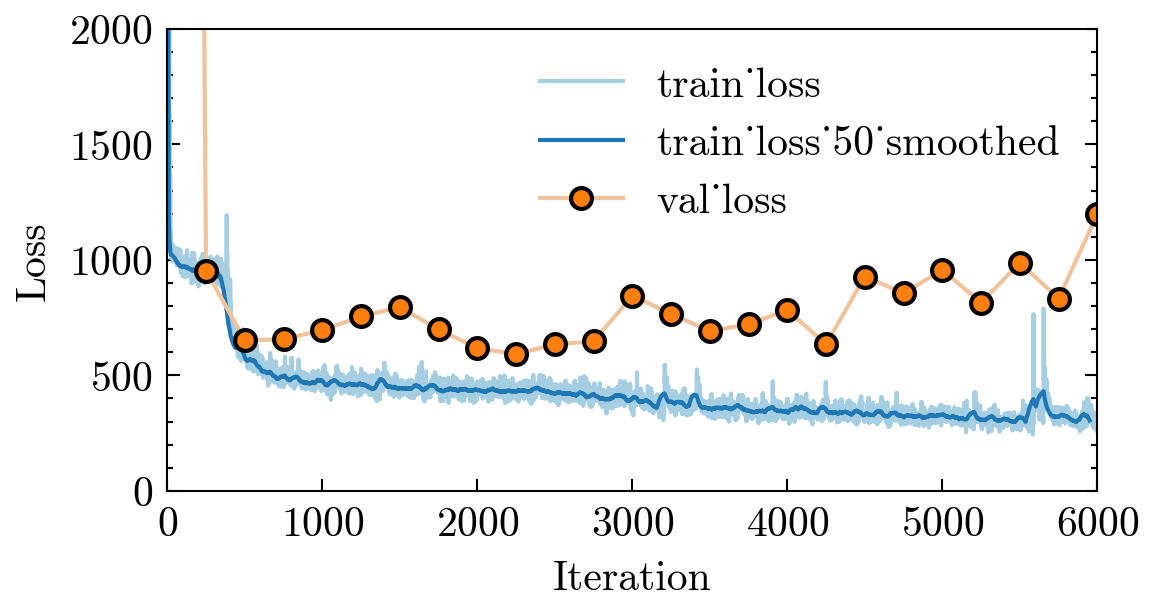

777.5507121086121
665.743899345398
1332.166383266449
1167.5100932121277
928.08442735672
820.8232142925262
775.5724852085114
666.866555929184
686.0347030162811
597.0809593200684
676.1641306877136
566.0584721565247
653.252435207367
550.8082096576691
626.0219554901123
527.2326502799988
610.7777171134949
520.2985479831696
599.6828508377075
503.4632828235626
617.2837293148041
506.9861087799072



[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:50:59])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [23:50:59])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [23:50:59])
[DEBUG]: Resetting dropped connection: huggingface.co        (connectionpool.py:291 [23:50:59])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [23:50:59])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [23:50:59])
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[DEBUG]: Freezing LLM parameters        (knowledge_encoder.py:28 [23:51:21])
[DEBUG]: Al

iter 1: Val. Loss (NLL): 24810.960006713867


[INFO]: Saving new best val loss model at iter 1        (train.py:106 [23:51:38])
  4%|▍         | 249/6000 [00:56<09:01, 10.62it/s] [INFO]: Removing model at path '../exp/k-multirun-2_iter1.pt'        (train.py:111 [23:52:37])


iter 250: Val. Loss (NLL): 952.9849324226379


[INFO]: Saving new best val loss model at iter 250        (train.py:116 [23:52:38])
  8%|▊         | 498/6000 [01:39<09:43,  9.43it/s]   [INFO]: Removing model at path '../exp/k-multirun-2_iter250.pt'        (train.py:111 [23:53:17])


iter 500: Val. Loss (NLL): 650.2680521011353


[INFO]: Saving new best val loss model at iter 500        (train.py:116 [23:53:18])
 13%|█▎        | 752/6000 [02:43<2:48:03,  1.92s/it]

iter 750: Val. Loss (NLL): 653.1922397613525


 17%|█▋        | 999/6000 [03:16<08:18, 10.02it/s]  [INFO]: Removing model at path '../exp/k-multirun-2_iter500.pt'        (train.py:111 [23:54:52])


iter 1000: Val. Loss (NLL): 587.6985845565796


[INFO]: Saving new best val loss model at iter 1000        (train.py:116 [23:54:53])
 21%|██        | 1252/6000 [04:08<2:11:40,  1.66s/it]

iter 1250: Val. Loss (NLL): 606.4738960266113


 25%|██▌       | 1501/6000 [04:44<2:21:27,  1.89s/it]

iter 1500: Val. Loss (NLL): 596.6849284172058


 29%|██▉       | 1752/6000 [05:20<2:11:07,  1.85s/it]

iter 1750: Val. Loss (NLL): 593.5601696968079


 33%|███▎      | 2004/6000 [05:55<1:20:55,  1.22s/it]

iter 2000: Val. Loss (NLL): 591.041740655899


 37%|███▋      | 2248/6000 [06:16<06:10, 10.12it/s]  [INFO]: Removing model at path '../exp/k-multirun-2_iter1000.pt'        (train.py:111 [23:57:53])


iter 2250: Val. Loss (NLL): 567.1048679351807


[INFO]: Saving new best val loss model at iter 2250        (train.py:116 [23:57:54])
 42%|████▏     | 2501/6000 [07:09<1:48:41,  1.86s/it]

iter 2500: Val. Loss (NLL): 575.2563881874084


 46%|████▌     | 2748/6000 [07:46<05:16, 10.27it/s]  [INFO]: Removing model at path '../exp/k-multirun-2_iter2250.pt'        (train.py:111 [23:59:09])


iter 2750: Val. Loss (NLL): 522.8118042945862


[INFO]: Saving new best val loss model at iter 2750        (train.py:116 [23:59:10])
 50%|█████     | 3002/6000 [08:24<1:18:12,  1.57s/it]

iter 3000: Val. Loss (NLL): 539.3288700580597


 54%|█████▍    | 3249/6000 [08:56<03:47, 12.07it/s]  [INFO]: Removing model at path '../exp/k-multirun-2_iter2750.pt'        (train.py:111 [00:00:22])


iter 3250: Val. Loss (NLL): 505.74156951904297


[INFO]: Saving new best val loss model at iter 3250        (train.py:116 [00:00:24])
 58%|█████▊    | 3499/6000 [09:24<04:27,  9.36it/s]  [INFO]: Removing model at path '../exp/k-multirun-2_iter3250.pt'        (train.py:111 [00:01:01])


iter 3500: Val. Loss (NLL): 498.9801685810089


[INFO]: Saving new best val loss model at iter 3500        (train.py:116 [00:01:02])
 63%|██████▎   | 3752/6000 [10:17<1:08:11,  1.82s/it]

iter 3750: Val. Loss (NLL): 659.5035080909729


 67%|██████▋   | 4000/6000 [11:01<2:13:52,  4.02s/it]

iter 4000: Val. Loss (NLL): 507.9566926956177


 71%|███████   | 4251/6000 [12:11<1:56:55,  4.01s/it]

iter 4250: Val. Loss (NLL): 506.5899968147278


 75%|███████▌  | 4501/6000 [13:07<1:49:46,  4.39s/it]

iter 4500: Val. Loss (NLL): 534.0838315486908


 79%|███████▉  | 4751/6000 [13:43<53:09,  2.55s/it]  

iter 4750: Val. Loss (NLL): 551.1506199836731


 83%|████████▎ | 5001/6000 [14:19<29:45,  1.79s/it]

iter 5000: Val. Loss (NLL): 581.1874232292175


 88%|████████▊ | 5251/6000 [14:56<23:35,  1.89s/it]

iter 5250: Val. Loss (NLL): 581.777515411377


 92%|█████████▏| 5501/6000 [15:32<16:24,  1.97s/it]

iter 5500: Val. Loss (NLL): 646.5095582008362


 96%|█████████▌| 5751/6000 [16:09<08:05,  1.95s/it]

iter 5750: Val. Loss (NLL): 713.7110648155212


100%|██████████| 6000/6000 [16:47<00:00,  5.96it/s]

iter 6000: Val. Loss (NLL): 683.432436466217


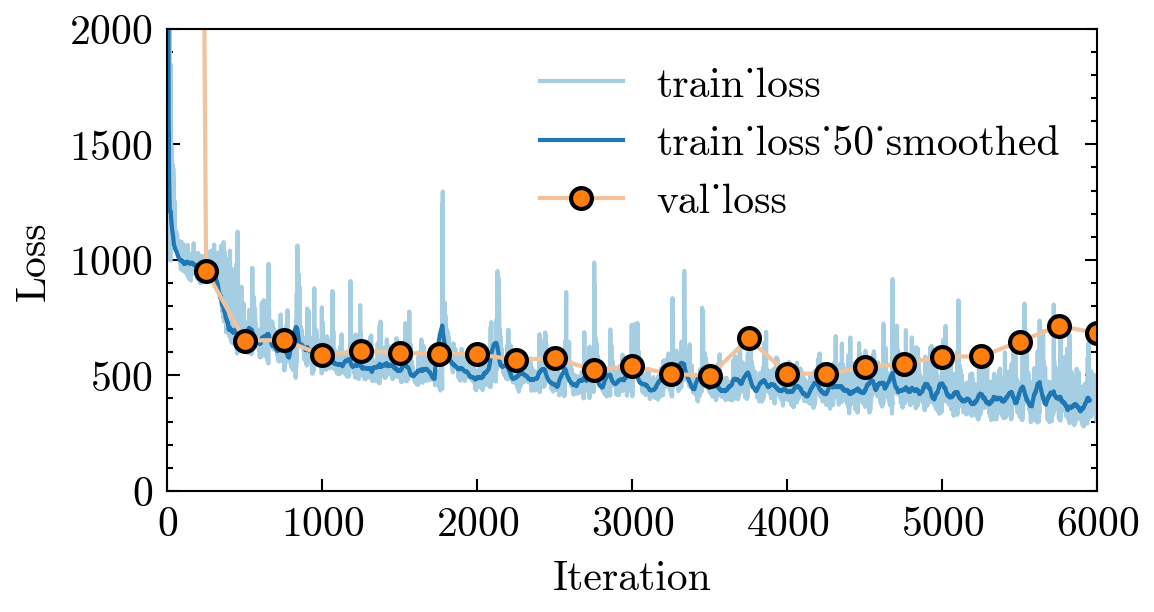

[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:08:09])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:08:09])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [00:08:09])
  0%|          | 7/6000 [00:01<17:11,  5.81it/s]  

iter 1: Val. Loss (NLL): 27879.96824645996


  4%|▍         | 244/6000 [00:05<01:31, 62.95it/s][INFO]: Removing model at path '../exp/nok-multirun-2_iter1.pt'        (train.py:111 [00:08:16])
[INFO]: Saving new best val loss model at iter 250        (train.py:116 [00:08:16])
  4%|▍         | 258/6000 [00:07<05:46, 16.57it/s]

iter 250: Val. Loss (NLL): 951.7436261177063


  8%|▊         | 496/6000 [00:10<01:28, 62.11it/s][INFO]: Removing model at path '../exp/nok-multirun-2_iter250.pt'        (train.py:111 [00:08:21])
[INFO]: Saving new best val loss model at iter 500        (train.py:116 [00:08:22])
  8%|▊         | 510/6000 [00:12<05:34, 16.40it/s]

iter 500: Val. Loss (NLL): 630.1676483154297


 13%|█▎        | 762/6000 [00:18<05:12, 16.74it/s]

iter 750: Val. Loss (NLL): 657.5896077156067


 17%|█▋        | 1007/6000 [00:23<04:57, 16.76it/s]

iter 1000: Val. Loss (NLL): 719.6652331352234


 21%|██        | 1259/6000 [00:29<04:44, 16.67it/s]

iter 1250: Val. Loss (NLL): 644.6331100463867


 25%|██▌       | 1511/6000 [00:34<04:29, 16.66it/s]

iter 1500: Val. Loss (NLL): 666.2235617637634


 29%|██▉       | 1761/6000 [00:39<04:02, 17.51it/s]

iter 1750: Val. Loss (NLL): 636.3520750999451


 33%|███▎      | 2006/6000 [00:45<05:14, 12.69it/s]

iter 2000: Val. Loss (NLL): 650.9165728092194


 38%|███▊      | 2258/6000 [00:50<03:43, 16.73it/s]

iter 2250: Val. Loss (NLL): 715.6927750110626


 42%|████▏     | 2510/6000 [00:56<03:29, 16.68it/s]

iter 2500: Val. Loss (NLL): 711.5324506759644


 46%|████▌     | 2745/6000 [00:59<00:44, 73.90it/s][INFO]: Removing model at path '../exp/nok-multirun-2_iter500.pt'        (train.py:111 [00:09:10])
[INFO]: Saving new best val loss model at iter 2750        (train.py:116 [00:09:10])
 46%|████▌     | 2753/6000 [01:01<03:44, 14.48it/s]

iter 2750: Val. Loss (NLL): 620.4801745414734


 50%|█████     | 3011/6000 [01:06<02:58, 16.72it/s]

iter 3000: Val. Loss (NLL): 627.0651392936707


 54%|█████▍    | 3256/6000 [01:12<03:35, 12.72it/s]

iter 3250: Val. Loss (NLL): 670.9729199409485


 58%|█████▊    | 3494/6000 [01:16<00:40, 61.40it/s][INFO]: Removing model at path '../exp/nok-multirun-2_iter2750.pt'        (train.py:111 [00:09:27])
[INFO]: Saving new best val loss model at iter 3500        (train.py:116 [00:09:27])
 58%|█████▊    | 3508/6000 [01:17<02:31, 16.42it/s]

iter 3500: Val. Loss (NLL): 581.124532699585


 63%|██████▎   | 3757/6000 [01:23<02:12, 16.88it/s]

iter 3750: Val. Loss (NLL): 715.0629768371582


 67%|██████▋   | 4009/6000 [01:28<01:59, 16.70it/s]

iter 4000: Val. Loss (NLL): 837.4833011627197


 71%|███████   | 4261/6000 [01:34<01:44, 16.67it/s]

iter 4250: Val. Loss (NLL): 776.7241027355194


 75%|███████▌  | 4512/6000 [01:39<01:29, 16.72it/s]

iter 4500: Val. Loss (NLL): 831.3253107070923


 79%|███████▉  | 4757/6000 [01:45<01:14, 16.74it/s]

iter 4750: Val. Loss (NLL): 818.5364553928375


 83%|████████▎ | 5009/6000 [01:50<00:59, 16.68it/s]

iter 5000: Val. Loss (NLL): 823.3616926670074


 88%|████████▊ | 5261/6000 [01:56<00:44, 16.66it/s]

iter 5250: Val. Loss (NLL): 772.3542778491974


 92%|█████████▏| 5506/6000 [02:01<00:38, 12.68it/s]

iter 5500: Val. Loss (NLL): 931.8773853778839


 96%|█████████▌| 5756/6000 [02:07<00:19, 12.67it/s]

iter 5750: Val. Loss (NLL): 820.2741684913635


100%|██████████| 6000/6000 [02:12<00:00, 45.27it/s]

iter 6000: Val. Loss (NLL): 1010.2138352394104


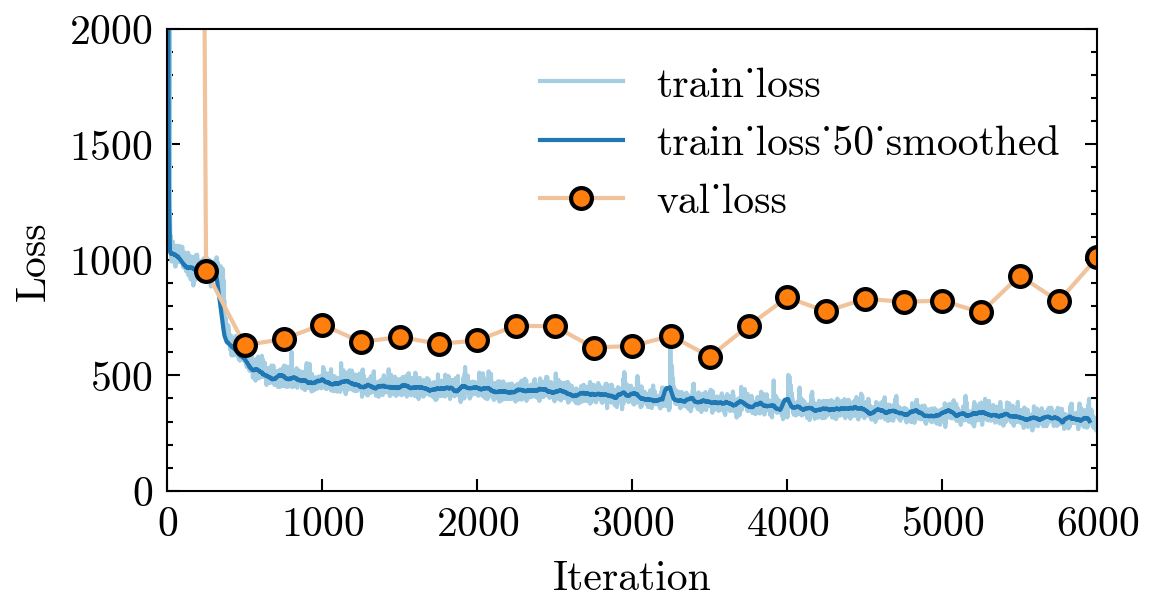

651.959409236908
602.2778661251068
1058.7537245750427
1083.9936861991882
770.5472400188446
809.615603685379
685.2092640399933
663.2487390041351
607.3723394870758
580.0948166847229
576.6090528964996
541.5574159622192
570.1177046298981
523.4495074748993
545.6859004497528
484.0685863494873
546.8339192867279
502.0116958618164
532.0635650157928
481.77639961242676
529.5125870704651
464.2065908908844



[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:10:58])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:10:58])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [00:10:58])
[DEBUG]: Resetting dropped connection: huggingface.co        (connectionpool.py:291 [00:10:58])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [00:10:59])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [00:10:59])
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[DEBUG]: Freezing LLM parameters        (knowledge_encoder.py:28 [00:11:19])
[DEBUG]: Al

iter 1: Val. Loss (NLL): 28776.02685546875


[INFO]: Saving new best val loss model at iter 1        (train.py:106 [00:11:35])
  4%|▍         | 232/6000 [00:35<10:23,  9.26it/s] [INFO]: Removing model at path '../exp/k-multirun-3_iter1.pt'        (train.py:111 [00:12:11])


iter 250: Val. Loss (NLL): 994.3166007995605


[INFO]: Saving new best val loss model at iter 250        (train.py:116 [00:12:12])
  8%|▊         | 499/6000 [01:13<08:10, 11.21it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter250.pt'        (train.py:111 [00:12:47])


iter 500: Val. Loss (NLL): 678.1891822814941


 12%|█▏        | 749/6000 [01:50<07:06, 12.30it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter500.pt'        (train.py:111 [00:13:24])


iter 750: Val. Loss (NLL): 655.5171818733215


[INFO]: Saving new best val loss model at iter 750        (train.py:116 [00:13:25])
 17%|█▋        | 998/6000 [02:38<05:12, 16.03it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter750.pt'        (train.py:111 [00:14:01])


iter 1000: Val. Loss (NLL): 648.8153080940247


[INFO]: Saving new best val loss model at iter 1000        (train.py:116 [00:14:02])
 21%|██        | 1251/6000 [03:18<2:14:30,  1.70s/it]

iter 1250: Val. Loss (NLL): 652.2095437049866


 25%|██▌       | 1501/6000 [03:52<2:13:25,  1.78s/it]

iter 1500: Val. Loss (NLL): 658.3234066963196


 29%|██▉       | 1751/6000 [04:26<2:06:06,  1.78s/it]

iter 1750: Val. Loss (NLL): 692.4143023490906


 33%|███▎      | 2001/6000 [05:00<2:09:26,  1.94s/it]

iter 2000: Val. Loss (NLL): 666.1413049697876


 37%|███▋      | 2249/6000 [05:20<04:50, 12.92it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter1000.pt'        (train.py:111 [00:16:54])


iter 2250: Val. Loss (NLL): 627.8099615573883


[INFO]: Saving new best val loss model at iter 2250        (train.py:116 [00:16:55])
 42%|████▏     | 2501/6000 [06:10<1:56:43,  2.00s/it]

iter 2500: Val. Loss (NLL): 650.0525593757629


 46%|████▌     | 2748/6000 [06:34<05:27,  9.92it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter2250.pt'        (train.py:111 [00:18:07])


iter 2750: Val. Loss (NLL): 587.1854870319366


 50%|████▉     | 2998/6000 [07:10<04:15, 11.74it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter2750.pt'        (train.py:111 [00:18:44])


iter 3000: Val. Loss (NLL): 563.1041312217712


[INFO]: Saving new best val loss model at iter 3000        (train.py:116 [00:18:45])
 54%|█████▍    | 3247/6000 [07:58<03:12, 14.27it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter3000.pt'        (train.py:111 [00:19:20])


iter 3250: Val. Loss (NLL): 552.4214017391205


[INFO]: Saving new best val loss model at iter 3250        (train.py:116 [00:19:21])
 58%|█████▊    | 3499/6000 [08:22<03:40, 11.36it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter3250.pt'        (train.py:111 [00:19:56])


iter 3500: Val. Loss (NLL): 547.6330835819244


[INFO]: Saving new best val loss model at iter 3500        (train.py:116 [00:19:57])
 62%|██████▏   | 3748/6000 [09:08<02:12, 17.02it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter3500.pt'        (train.py:111 [00:20:31])


iter 3750: Val. Loss (NLL): 527.5285224914551


[INFO]: Saving new best val loss model at iter 3750        (train.py:116 [00:20:32])
 67%|██████▋   | 3998/6000 [09:34<03:43,  8.97it/s]  [INFO]: Removing model at path '../exp/k-multirun-3_iter3750.pt'        (train.py:111 [00:21:07])


iter 4000: Val. Loss (NLL): 511.02364587783813


[INFO]: Saving new best val loss model at iter 4000        (train.py:116 [00:21:09])
 71%|███████   | 4251/6000 [10:24<1:10:12,  2.41s/it]

iter 4250: Val. Loss (NLL): 534.23472905159


 75%|███████▌  | 4501/6000 [10:59<46:49,  1.87s/it]  

iter 4500: Val. Loss (NLL): 515.2378101348877


 79%|███████▉  | 4751/6000 [11:34<33:54,  1.63s/it]

iter 4750: Val. Loss (NLL): 546.6367197036743


 83%|████████▎ | 5001/6000 [12:08<27:06,  1.63s/it]

iter 5000: Val. Loss (NLL): 577.0804762840271


 88%|████████▊ | 5251/6000 [12:44<29:41,  2.38s/it]

iter 5250: Val. Loss (NLL): 588.1748313903809


 92%|█████████▏| 5501/6000 [13:19<11:31,  1.39s/it]

iter 5500: Val. Loss (NLL): 566.6881856918335


 96%|█████████▌| 5752/6000 [13:55<07:55,  1.92s/it]

iter 5750: Val. Loss (NLL): 645.147780418396


100%|██████████| 6000/6000 [14:30<00:00,  6.89it/s]

iter 6000: Val. Loss (NLL): 606.1990113258362


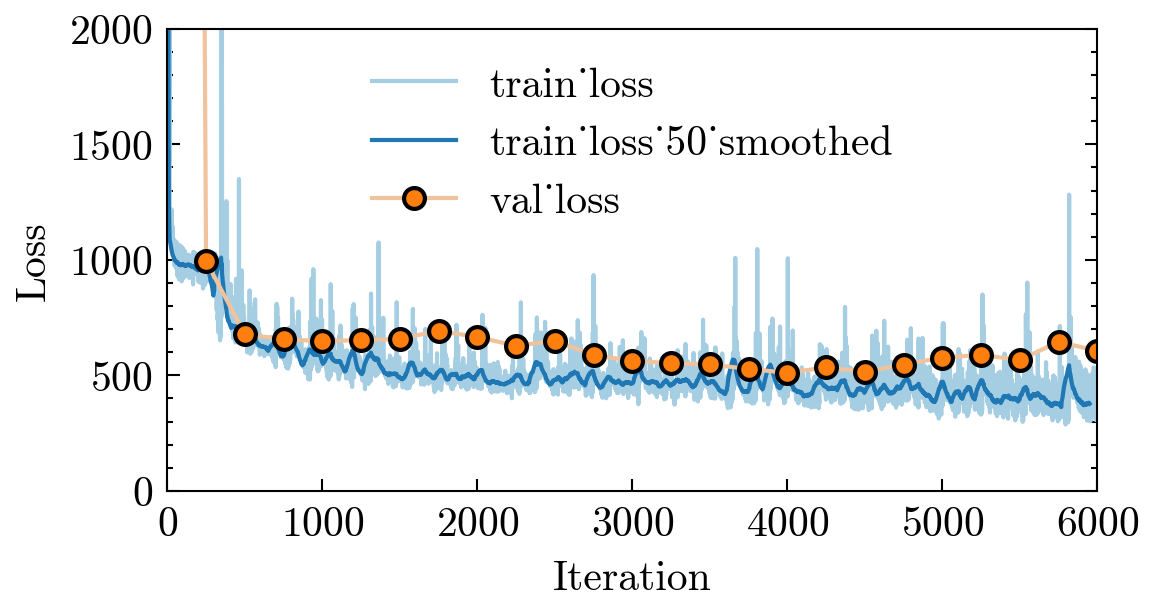

[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:25:51])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:25:51])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [00:25:51])
  0%|          | 8/6000 [00:01<15:09,  6.59it/s]  

iter 1: Val. Loss (NLL): 31828.224700927734


  4%|▍         | 244/6000 [00:05<01:32, 62.43it/s][INFO]: Removing model at path '../exp/nok-multirun-3_iter1.pt'        (train.py:111 [00:25:58])
[INFO]: Saving new best val loss model at iter 250        (train.py:116 [00:25:58])
  4%|▍         | 258/6000 [00:07<05:47, 16.55it/s]

iter 250: Val. Loss (NLL): 999.3928303718567


  8%|▊         | 495/6000 [00:10<01:28, 62.32it/s][INFO]: Removing model at path '../exp/nok-multirun-3_iter250.pt'        (train.py:111 [00:26:04])
[INFO]: Saving new best val loss model at iter 500        (train.py:116 [00:26:04])
  8%|▊         | 509/6000 [00:12<05:34, 16.41it/s]

iter 500: Val. Loss (NLL): 666.038366317749


 12%|█▏        | 747/6000 [00:16<01:25, 61.49it/s][INFO]: Removing model at path '../exp/nok-multirun-3_iter500.pt'        (train.py:111 [00:26:09])
[INFO]: Saving new best val loss model at iter 750        (train.py:116 [00:26:09])
 13%|█▎        | 761/6000 [00:18<05:18, 16.47it/s]

iter 750: Val. Loss (NLL): 655.127489566803


 17%|█▋        | 1006/6000 [00:23<06:33, 12.69it/s]

iter 1000: Val. Loss (NLL): 725.8384056091309


 21%|██        | 1257/6000 [00:29<04:44, 16.69it/s]

iter 1250: Val. Loss (NLL): 725.8921146392822


 25%|██▌       | 1509/6000 [00:34<04:30, 16.60it/s]

iter 1500: Val. Loss (NLL): 845.4902210235596


 29%|██▉       | 1760/6000 [00:40<04:14, 16.67it/s]

iter 1750: Val. Loss (NLL): 773.324658870697


 34%|███▎      | 2012/6000 [00:45<03:59, 16.68it/s]

iter 2000: Val. Loss (NLL): 786.6083483695984


 38%|███▊      | 2256/6000 [00:50<04:55, 12.67it/s]

iter 2250: Val. Loss (NLL): 708.6206440925598


 42%|████▏     | 2508/6000 [00:56<03:29, 16.66it/s]

iter 2500: Val. Loss (NLL): 678.6454482078552


 46%|████▌     | 2760/6000 [01:02<03:14, 16.63it/s]

iter 2750: Val. Loss (NLL): 679.2201728820801


 50%|█████     | 3012/6000 [01:07<02:58, 16.70it/s]

iter 3000: Val. Loss (NLL): 709.286402463913


 54%|█████▍    | 3257/6000 [01:12<02:44, 16.70it/s]

iter 3250: Val. Loss (NLL): 666.9236233234406


 58%|█████▊    | 3509/6000 [01:18<02:28, 16.72it/s]

iter 3500: Val. Loss (NLL): 681.7786092758179


 63%|██████▎   | 3760/6000 [01:23<02:14, 16.67it/s]

iter 3750: Val. Loss (NLL): 726.9373285770416


 67%|██████▋   | 4012/6000 [01:29<01:59, 16.68it/s]

iter 4000: Val. Loss (NLL): 709.0505447387695


 71%|███████   | 4257/6000 [01:34<01:44, 16.63it/s]

iter 4250: Val. Loss (NLL): 756.8456876277924


 75%|███████▌  | 4509/6000 [01:40<01:29, 16.74it/s]

iter 4500: Val. Loss (NLL): 751.9016299247742


 79%|███████▉  | 4760/6000 [01:45<01:14, 16.75it/s]

iter 4750: Val. Loss (NLL): 745.2477698326111


 84%|████████▎ | 5012/6000 [01:51<00:59, 16.63it/s]

iter 5000: Val. Loss (NLL): 704.6574921607971


 88%|████████▊ | 5257/6000 [01:56<00:44, 16.63it/s]

iter 5250: Val. Loss (NLL): 873.9272246360779


 92%|█████████▏| 5509/6000 [02:02<00:29, 16.69it/s]

iter 5500: Val. Loss (NLL): 984.4435348510742


 96%|█████████▌| 5761/6000 [02:07<00:14, 16.64it/s]

iter 5750: Val. Loss (NLL): 871.1340250968933


100%|██████████| 6000/6000 [02:13<00:00, 45.10it/s]

iter 6000: Val. Loss (NLL): 967.5355076789856


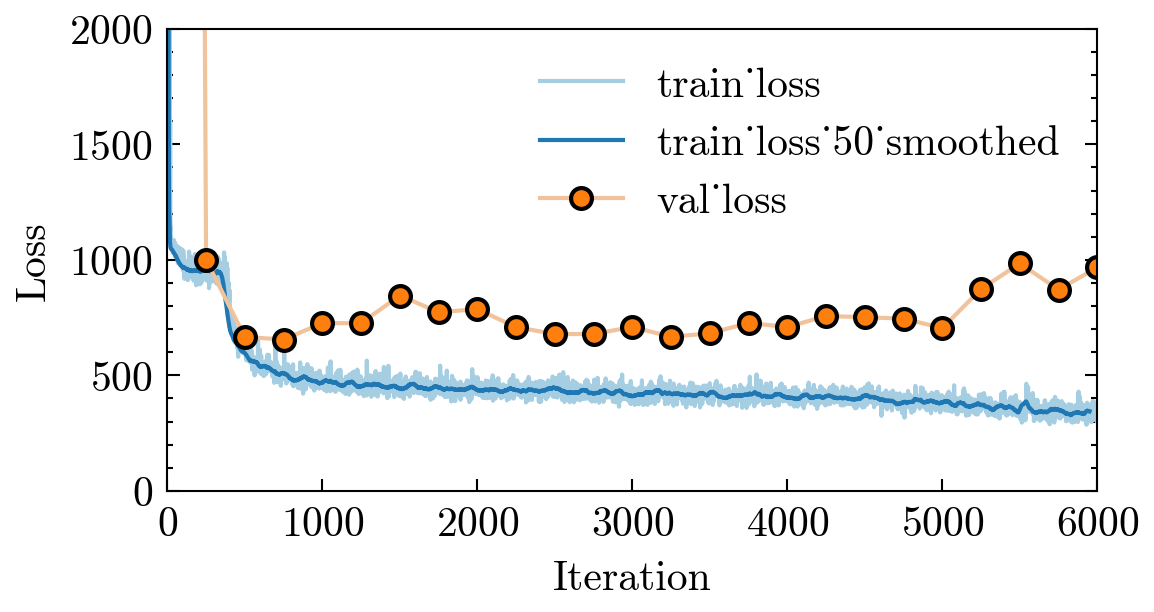

968.569890499115
674.8723590373993
1464.4047393798828
962.4739298820496
1141.9951434135437
771.9296808242798
979.1890921592712
654.4645295143127
921.6233386993408
623.8664517402649
900.1968102455139
593.7844338417053
857.912281036377
579.1370930671692
833.4055161476135
594.122138261795
822.0833687782288
580.7835855484009
817.2782783508301
570.4028239250183
814.2421307563782
569.5011615753174



[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:28:41])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:28:41])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [00:28:41])
[DEBUG]: Resetting dropped connection: huggingface.co        (connectionpool.py:291 [00:28:41])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [00:28:41])
[DEBUG]: https://huggingface.co:443 "HEAD /roberta-base/resolve/main/config.json HTTP/11" 200 0        (connectionpool.py:546 [00:28:41])
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[DEBUG]: Freezing LLM parameters        (knowledge_encoder.py:28 [00:29:02])
[DEBUG]: Al

iter 1: Val. Loss (NLL): 33045.03324890137


[INFO]: Saving new best val loss model at iter 1        (train.py:106 [00:29:17])
  4%|▍         | 248/6000 [00:36<08:02, 11.91it/s] [INFO]: Removing model at path '../exp/k-multirun-4_iter1.pt'        (train.py:111 [00:29:53])


iter 250: Val. Loss (NLL): 998.1780710220337


[INFO]: Saving new best val loss model at iter 250        (train.py:116 [00:29:54])
  8%|▊         | 498/6000 [01:25<08:33, 10.71it/s]  [INFO]: Removing model at path '../exp/k-multirun-4_iter250.pt'        (train.py:111 [00:30:31])


iter 500: Val. Loss (NLL): 688.0217628479004


[INFO]: Saving new best val loss model at iter 500        (train.py:116 [00:30:32])
 12%|█▏        | 748/6000 [01:50<09:40,  9.05it/s]  [INFO]: Removing model at path '../exp/k-multirun-4_iter500.pt'        (train.py:111 [00:31:07])


iter 750: Val. Loss (NLL): 686.9509582519531


[INFO]: Saving new best val loss model at iter 750        (train.py:116 [00:31:08])
 17%|█▋        | 999/6000 [02:27<06:42, 12.42it/s]  [INFO]: Removing model at path '../exp/k-multirun-4_iter750.pt'        (train.py:111 [00:31:43])


iter 1000: Val. Loss (NLL): 647.2142963409424


[INFO]: Saving new best val loss model at iter 1000        (train.py:116 [00:31:45])
 21%|██        | 1251/6000 [03:18<2:29:15,  1.89s/it]

iter 1250: Val. Loss (NLL): 704.5359334945679


 25%|██▌       | 1501/6000 [03:54<2:26:19,  1.95s/it]

iter 1500: Val. Loss (NLL): 652.4711194038391


 29%|██▉       | 1751/6000 [04:30<2:05:40,  1.77s/it]

iter 1750: Val. Loss (NLL): 648.4939131736755


 33%|███▎      | 2001/6000 [05:06<1:58:16,  1.77s/it]

iter 2000: Val. Loss (NLL): 775.0736246109009


 38%|███▊      | 2253/6000 [05:41<1:39:30,  1.59s/it]

iter 2250: Val. Loss (NLL): 711.4220957756042


 42%|████▏     | 2501/6000 [06:17<1:59:06,  2.04s/it]

iter 2500: Val. Loss (NLL): 683.0022644996643


 46%|████▌     | 2748/6000 [06:39<03:15, 16.60it/s]  [INFO]: Removing model at path '../exp/k-multirun-4_iter1000.pt'        (train.py:111 [00:35:56])


iter 2750: Val. Loss (NLL): 622.083247423172


[INFO]: Saving new best val loss model at iter 2750        (train.py:116 [00:35:57])
 50%|████▉     | 2999/6000 [07:16<03:50, 13.05it/s]  [INFO]: Removing model at path '../exp/k-multirun-4_iter2750.pt'        (train.py:111 [00:36:33])


iter 3000: Val. Loss (NLL): 609.29265832901


[INFO]: Saving new best val loss model at iter 3000        (train.py:116 [00:36:34])
 54%|█████▍    | 3248/6000 [08:05<03:49, 11.98it/s]  [INFO]: Removing model at path '../exp/k-multirun-4_iter3000.pt'        (train.py:111 [00:37:09])


iter 3250: Val. Loss (NLL): 553.3710236549377


[INFO]: Saving new best val loss model at iter 3250        (train.py:116 [00:37:10])
 58%|█████▊    | 3499/6000 [08:30<03:51, 10.80it/s]  [INFO]: Removing model at path '../exp/k-multirun-4_iter3250.pt'        (train.py:111 [00:37:46])


iter 3500: Val. Loss (NLL): 511.9185736179352


[INFO]: Saving new best val loss model at iter 3500        (train.py:116 [00:37:48])
 63%|██████▎   | 3752/6000 [09:21<1:06:43,  1.78s/it]

iter 3750: Val. Loss (NLL): 525.1135339736938


 67%|██████▋   | 4004/6000 [09:56<45:02,  1.35s/it]  

iter 4000: Val. Loss (NLL): 529.394871711731


 71%|███████   | 4251/6000 [10:33<47:04,  1.62s/it]

iter 4250: Val. Loss (NLL): 527.9819338321686


 75%|███████▌  | 4502/6000 [11:08<42:42,  1.71s/it]  

iter 4500: Val. Loss (NLL): 551.6189613342285


 79%|███████▉  | 4751/6000 [11:44<45:02,  2.16s/it]

iter 4750: Val. Loss (NLL): 554.3155658245087


 83%|████████▎ | 5001/6000 [12:19<36:24,  2.19s/it]

iter 5000: Val. Loss (NLL): 577.7607414722443


 88%|████████▊ | 5251/6000 [12:55<21:08,  1.69s/it]

iter 5250: Val. Loss (NLL): 558.106276512146


 92%|█████████▏| 5501/6000 [13:30<14:51,  1.79s/it]

iter 5500: Val. Loss (NLL): 624.0079684257507


 96%|█████████▌| 5752/6000 [14:06<06:44,  1.63s/it]

iter 5750: Val. Loss (NLL): 599.7042417526245


100%|██████████| 6000/6000 [14:41<00:00,  6.80it/s]

iter 6000: Val. Loss (NLL): 641.0998635292053


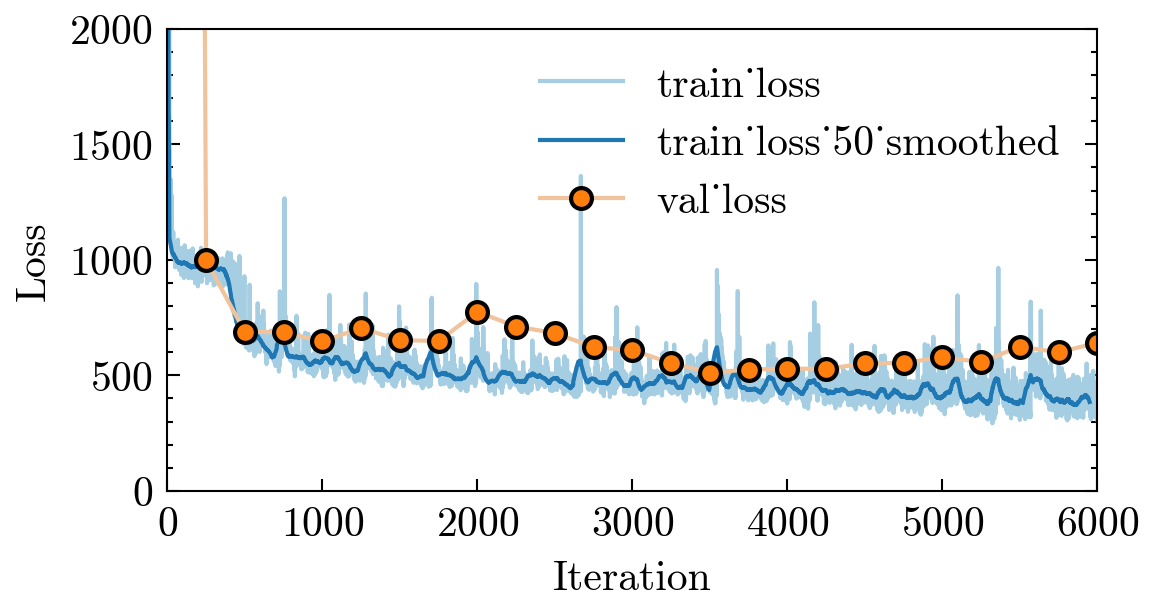

[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:43:45])
[WARNING]: Hidden activation set but no hidden layers        (mlp.py:22 [00:43:45])
[DEBUG]: XYEncoder has x_dim=1 and y_dim=1        (xy_encoders.py:57 [00:43:45])
  0%|          | 7/6000 [00:01<17:19,  5.77it/s]  

iter 1: Val. Loss (NLL): 33643.33769226074


  4%|▍         | 244/6000 [00:05<01:32, 62.25it/s][INFO]: Removing model at path '../exp/nok-multirun-4_iter1.pt'        (train.py:111 [00:43:52])
[INFO]: Saving new best val loss model at iter 250        (train.py:116 [00:43:52])
  4%|▍         | 258/6000 [00:07<05:51, 16.34it/s]

iter 250: Val. Loss (NLL): 994.8833961486816


  8%|▊         | 496/6000 [00:10<01:28, 62.47it/s][INFO]: Removing model at path '../exp/nok-multirun-4_iter250.pt'        (train.py:111 [00:43:57])
[INFO]: Saving new best val loss model at iter 500        (train.py:116 [00:43:57])
  8%|▊         | 510/6000 [00:12<05:35, 16.35it/s]

iter 500: Val. Loss (NLL): 643.2602181434631


 13%|█▎        | 762/6000 [00:18<05:14, 16.64it/s]

iter 750: Val. Loss (NLL): 690.986091375351


 17%|█▋        | 1007/6000 [00:23<04:59, 16.70it/s]

iter 1000: Val. Loss (NLL): 675.4020838737488


 21%|██        | 1259/6000 [00:29<04:42, 16.75it/s]

iter 1250: Val. Loss (NLL): 692.5514283180237


 25%|██▌       | 1510/6000 [00:34<04:30, 16.62it/s]

iter 1500: Val. Loss (NLL): 690.4362199306488


 29%|██▉       | 1761/6000 [00:40<04:13, 16.74it/s]

iter 1750: Val. Loss (NLL): 658.8747599124908


 33%|███▎      | 2006/6000 [00:45<05:13, 12.73it/s]

iter 2000: Val. Loss (NLL): 746.6518099308014


 38%|███▊      | 2261/6000 [00:51<03:45, 16.58it/s]

iter 2250: Val. Loss (NLL): 722.0731446743011


 42%|████▏     | 2506/6000 [00:56<04:35, 12.68it/s]

iter 2500: Val. Loss (NLL): 714.7155983448029


 46%|████▌     | 2758/6000 [01:02<03:14, 16.66it/s]

iter 2750: Val. Loss (NLL): 722.2399408817291


 50%|█████     | 3010/6000 [01:07<02:58, 16.74it/s]

iter 3000: Val. Loss (NLL): 691.2852230072021


 54%|█████▍    | 3247/6000 [01:11<00:44, 62.32it/s][INFO]: Removing model at path '../exp/nok-multirun-4_iter500.pt'        (train.py:111 [00:44:58])
[INFO]: Saving new best val loss model at iter 3250        (train.py:116 [00:44:58])
 54%|█████▍    | 3261/6000 [01:13<02:45, 16.50it/s]

iter 3250: Val. Loss (NLL): 621.2922868728638


 58%|█████▊    | 3506/6000 [01:18<03:27, 12.01it/s]

iter 3500: Val. Loss (NLL): 732.7510168552399


 63%|██████▎   | 3762/6000 [01:24<02:05, 17.80it/s]

iter 3750: Val. Loss (NLL): 658.9259600639343


 67%|██████▋   | 4007/6000 [01:29<01:59, 16.71it/s]

iter 4000: Val. Loss (NLL): 683.3673479557037


 71%|███████   | 4258/6000 [01:35<01:44, 16.72it/s]

iter 4250: Val. Loss (NLL): 722.4676475524902


 75%|███████▌  | 4510/6000 [01:41<01:29, 16.66it/s]

iter 4500: Val. Loss (NLL): 847.0775303840637


 79%|███████▉  | 4760/6000 [01:46<01:14, 16.68it/s]

iter 4750: Val. Loss (NLL): 900.6644034385681


 84%|████████▎ | 5011/6000 [01:52<00:59, 16.70it/s]

iter 5000: Val. Loss (NLL): 795.8885722160339


 88%|████████▊ | 5256/6000 [01:57<00:58, 12.68it/s]

iter 5250: Val. Loss (NLL): 913.0654811859131


 92%|█████████▏| 5508/6000 [02:02<00:29, 16.68it/s]

iter 5500: Val. Loss (NLL): 981.696455001831


 96%|█████████▌| 5759/6000 [02:08<00:14, 16.69it/s]

iter 5750: Val. Loss (NLL): 984.667537689209


100%|██████████| 6000/6000 [02:14<00:00, 44.77it/s]

iter 6000: Val. Loss (NLL): 1224.6907505989075


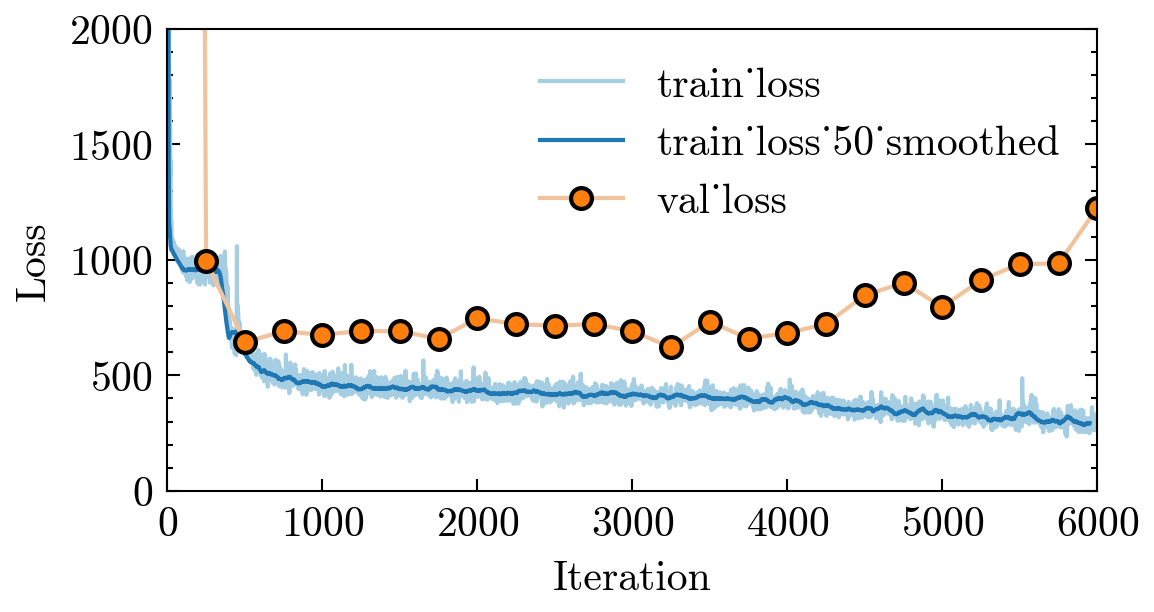

769.740302324295
695.8275372982025
1366.6046781539917
1242.8860988616943
1053.1286625862122
846.8494005203247
850.0085406303406
746.9522371292114
797.8876478672028
665.7040920257568
710.0027656555176
633.4915328025818
641.1366500854492
573.7359185218811
649.8887042999268
561.5995531082153
621.5935728549957
532.527398109436
604.3342480659485
526.2758128643036
597.0800604820251
516.0342800617218



In [19]:
from src.plot import plot_predictive
from src.informed_np import InformedNeuralProcess
from tqdm import tqdm
# from src.loss import ELBOLoss
from src.loss import ELBOLoss
from src.train import train    

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
logging.info(f'Using DEVICE: {DEVICE}')

USE_KNOWLEDGE = True
logging.info(f'USE_KNOWLEDGE: {USE_KNOWLEDGE}')

x_dim = 1
y_dim = 1
determ_dim = 128  # Dimension of representation of context points
latent_dim = 128  # Dimension of sampled latent variable
hidden_dim = 128  # Dimension of hidden layers in encoder and decoder


logging.info(f'Using optimiser Adam')
loss_function = ELBOLoss(beta=1, reduction='mean')

AVG_LOSS_PRINT_INTERVAL = 250
PLOT_SAMPLE_INTERVAL = 1000
MAX_ITERS = 6000

data_path = '../data/data_with_desc.csv'
data_frame = pd.read_csv(data_path, header=None)

np_test_losses = []
inp_test_losses = []
nok_inp_test_losses = []
nok_np_test_losses = []

for run in range(5):
    
    data = TempData(data=data_frame, max_num_context=10, device=DEVICE)

    model = InformedNeuralProcess(
        x_dim=x_dim,
        y_dim=y_dim,
        hidden_dim=hidden_dim,
        latent_dim=latent_dim,
        determ_dim=determ_dim,
        knowledge_dim=128,
        mlps_activation=nn.GELU(),
        x_proj_dim=1,
        n_h_layers_x_proj=0,
        n_h_layers_decoder=4,
        n_h_layers_latent_xy_encoder=3,
        n_h_layers_film_latent_encoder=3,
        path='latent',
        train_num_z_samples=4,
        test_num_z_samples=32,
        use_bias=True,
        use_context_in_target=True, # TODO investigate
        use_latent_self_attn=True,
        # use_determ_self_attn=True,
        # use_determ_cross_attn=True,
        use_knowledge=True,
        knowledge_dropout=0.3,
        roberta_return_cls=True,
        tune_llm_layer_norms=True,
        freeze_llm=True,
        knowledge_projection_n_h_layers=0,
        knowledge_aggregation_method='FiLM+MLP',
        device='cuda',
        beta=1.0
    ).to(DEVICE)
    optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
    model, best_model_path, optimiser, train_losses, val_losses = train(model=model,
                                                   data=data,
                                                   loss_function=loss_function,
                                                   optimiser=optimiser,
                                                   device=DEVICE,
                                                   use_knowledge=True,
                                                   max_iters=MAX_ITERS,
                                                   avg_loss_print_interval=AVG_LOSS_PRINT_INTERVAL,
                                                   plot_sample_interval=PLOT_SAMPLE_INTERVAL,
                                                                        model_save_name=f"k-multirun-{run}",
                                                                       verbose=False)
    
    nok_model = InformedNeuralProcess(
        x_dim=x_dim,
        y_dim=y_dim,
        hidden_dim=hidden_dim,
        latent_dim=latent_dim,
        determ_dim=determ_dim,
        knowledge_dim=128,
        mlps_activation=nn.GELU(),
        x_proj_dim=1,
        n_h_layers_x_proj=0,
        n_h_layers_decoder=4,
        n_h_layers_latent_xy_encoder=3,
        n_h_layers_film_latent_encoder=3,
        path='latent',
        train_num_z_samples=4,
        test_num_z_samples=32,
        use_bias=True,
        use_context_in_target=True, # TODO investigate
        use_latent_self_attn=True,
        # use_determ_self_attn=True,
        # use_determ_cross_attn=True,
        use_knowledge=False,
        knowledge_dropout=0.3,
        roberta_return_cls=True,
        tune_llm_layer_norms=True,
        freeze_llm=True,
        knowledge_projection_n_h_layers=0,
        knowledge_aggregation_method='FiLM+MLP',
        device='cuda',
        beta=1.0
    ).to(DEVICE)

    optimiser = torch.optim.Adam(nok_model.parameters(), lr=1e-3)
    nok_model, best_nok_model_path, optimiser, train_losses, val_losses = train(model=nok_model,
                                                       data=data,
                                                       loss_function=loss_function,
                                                       optimiser=optimiser,
                                                       device=DEVICE,
                                                       use_knowledge=False,
                                                       max_iters=MAX_ITERS,
                                                       avg_loss_print_interval=AVG_LOSS_PRINT_INTERVAL,
                                                       plot_sample_interval=PLOT_SAMPLE_INTERVAL,
                                                       model_save_name=f"nok-multirun-{run}",
                                                                               verbose=False)

    model.load_state_dict(torch.load(best_model_path))
    nok_model.load_state_dict(torch.load(best_nok_model_path))

    _inp_test_loss = []
    _np_test_loss = []
    num_contexts = np.arange(0, 10)
    nok_inp_test_losses.append(eval(model, data, use_knowledge=False, num_context=None))
    nok_np_test_losses.append(eval(nok_model, data, use_knowledge=False, num_context=None))
    for num_context in range(1, 11):
        _inp_test_loss.append(eval(model, data, use_knowledge=False, num_context=num_context))
        _np_test_loss.append(eval(nok_model, data, use_knowledge=False, num_context=num_context))
        # print(num_context)
        # print(f"INP Test loss {eval(model, data, num_context)}")
        # print(f"NP Test loss {}")
    print()
    inp_test_losses.append(_inp_test_loss)
    np_test_losses.append(_np_test_loss)

In [ ]:
# plt.rcdefaults()

In [22]:
nok_inp_test_losses

[593.5043091773987,
 777.5507121086121,
 651.959409236908,
 968.569890499115,
 769.740302324295]

# No K

[WARNING]: 
Bad key /cycler('ls', ['-', '--', ' in file ../figures/mplstyles/thesis.mplstyle, line 8 ("/cycler('ls', ['-', '--', ':', '-.'])")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution        (__init__.py:918 [11:16:33])


(752.2649246692657, 128.83999966685298)
(648.1516628742218, 38.80069791535283)


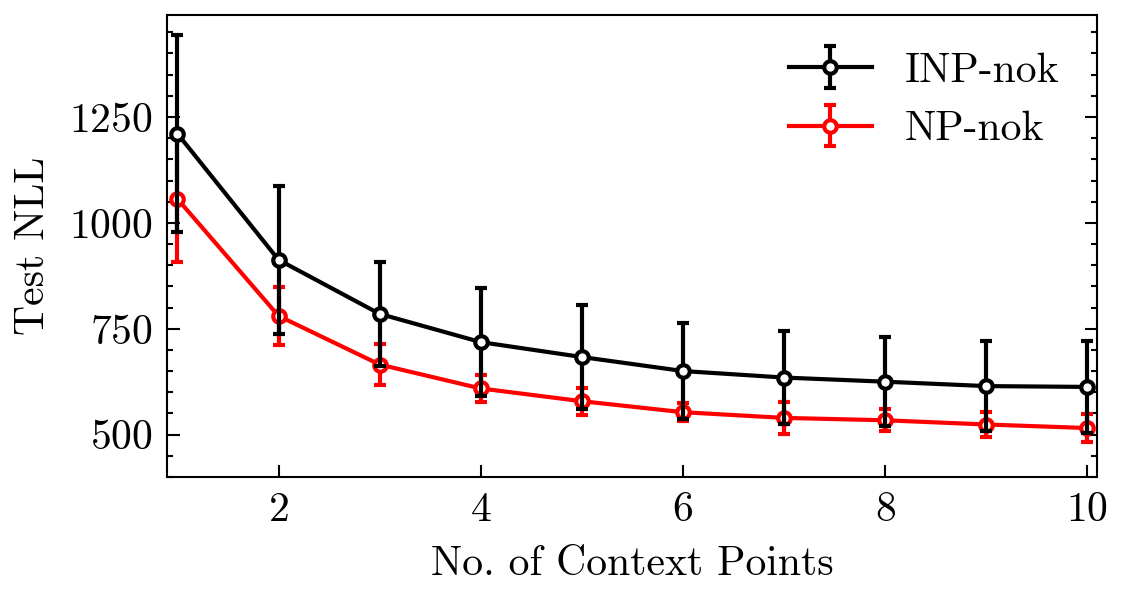

In [31]:
nok_overall_inp_test_loss = (np.array(nok_inp_test_losses).mean(), np.array(nok_inp_test_losses).std())
nok_overall_np_test_loss =  (np.array(nok_np_test_losses).mean(), np.array(nok_np_test_losses).std())

print(nok_overall_inp_test_loss)
print(nok_overall_np_test_loss)

inp_test_losses_array = np.array(inp_test_losses)
np_test_losses_array = np.array(np_test_losses)
# print(inp_test_losses_array)
# print(np_test_losses_array)
# plt.style.use('../figures/mplstyles/ieee.mplstyle')
# plt.style.use('../figures/mplstyles/science.mplstyle')
# plt.style.use('../figures/mplstyles/no_latex.mplstyle')

plt.style.use('../figures/mplstyles/thesis.mplstyle')

# Plot the data
# plt.figure(figsize=(10, 6))
num_context_points = range(1, 11)
# plt.plot(num_context_points, inp_test_losses_array.mean(axis=0), label='INP', marker='o', markersize=3)
# plt.plot(num_context_points, np_test_losses_array.mean(axis=0), label='NP', marker='x', markersize=3)
plt.errorbar(num_context_points, 
             inp_test_losses_array.mean(axis=0), 
             yerr=inp_test_losses_array.std(axis=0), 
             capsize=1.5,marker='o', markersize=3, mfc='white',zorder=11, label="INP-nok")
plt.errorbar(num_context_points, 
             np_test_losses_array.mean(axis=0), 
             yerr=np_test_losses_array.std(axis=0), 
             capsize=1.5,  marker='o', markersize=3, mfc='white',zorder=10, label="NP-nok")

plt.xlabel('No. of Context Points')
plt.ylabel('Test NLL')
plt.legend()
plt.xlim(0.9, 10.1)
plt.ylim(400,)
plt.savefig(f'../figures/nok-inp_vs_np_context_points.png', dpi=300)
plt.show()


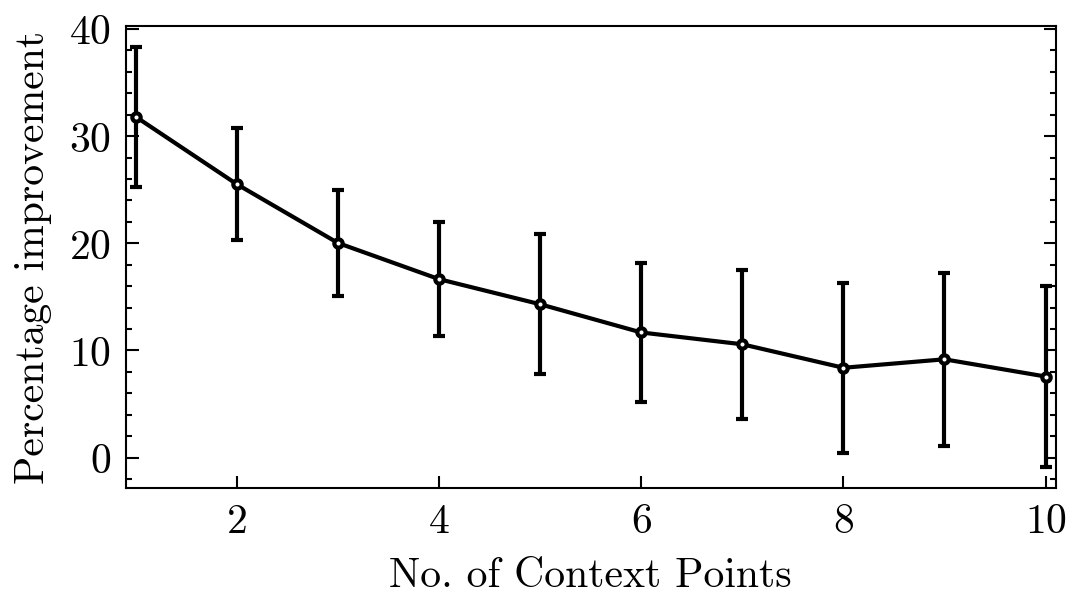

In [10]:
percentage_improvement = ((np_test_losses_array - inp_test_losses_array) / np_test_losses_array).mean(axis=0) * 100
percentage_improvement_std = ((np_test_losses_array - inp_test_losses_array) / np_test_losses_array).std(axis=0) * 100

num_context_points = range(1, 11)
# plt.plot(num_context_points, inp_test_losses_array.mean(axis=0), label='INP', marker='o', markersize=3)
# plt.plot(num_context_points, np_test_losses_array.mean(axis=0), label='NP', marker='x', markersize=3)
plt.errorbar(num_context_points, 
             percentage_improvement, 
             yerr=percentage_improvement_std, 
             capsize=1.5,marker='o', markersize=2, mfc='white',zorder=10, label="INP")

plt.xlabel('No. of Context Points')
plt.ylabel('Percentage improvement')
# plt.legend()
plt.xlim(0.9, 10.1)
# plt.ylim(400,)
plt.savefig(f'../figures/inp_vs_np_percentage_improvement.png', dpi=300)
plt.show()

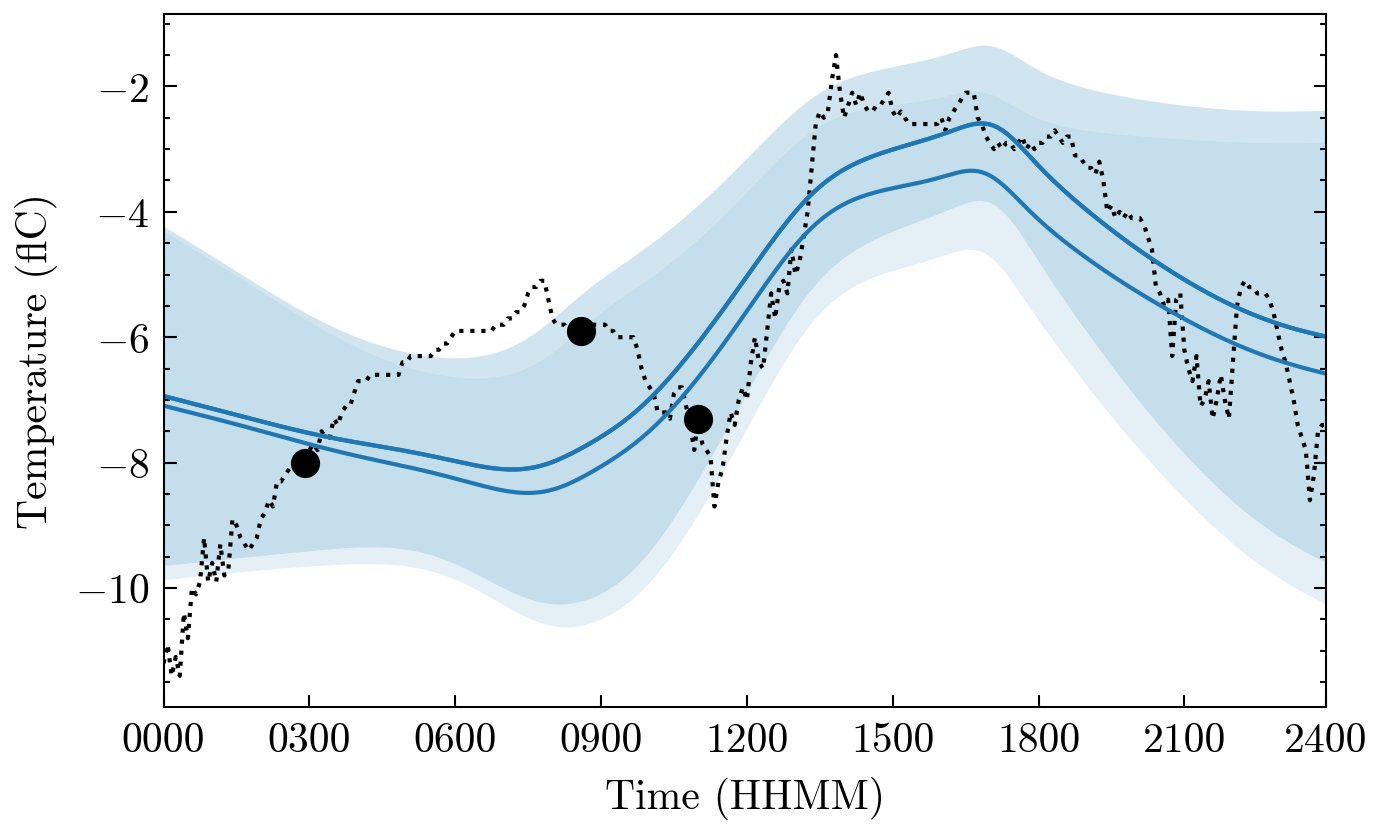

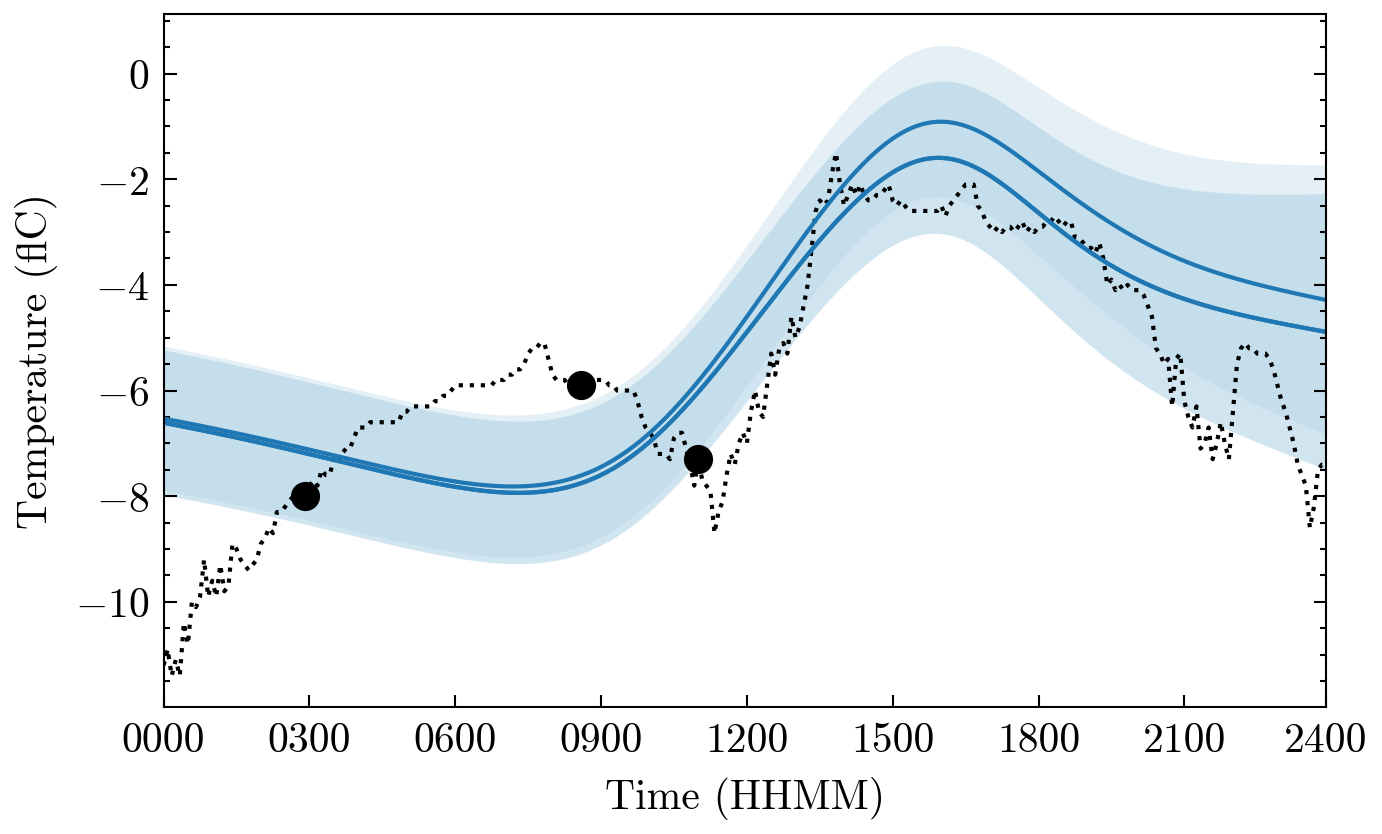

In [106]:
model.load_state_dict(torch.load("../exp/bestK_iter3750.pt"))
nok_model.load_state_dict(torch.load("../exp/bestNoK_iter500.pt"))

batch = data.generate_batch(batch_size=1,
                            device=DEVICE,
                            split='val',
                            return_knowledge=True,
                           num_context=3)
plot_predictive(model, batch)
plot_predictive(nok_model, batch)
# print(batch.knowledge)
# no = 3
# plot_predictive(model, batch, save=True, save_name=f"../figures/INP_trained_sample{no}")
# plot_predictive(no_knowledge_model, batch, save=True, save_name=f"../figures/NP_trained_sample{no}")